![](https://play.google.com/about/howplayworks/static/assets/social/share_google_play_logo.png)
# Exploratory Data Analysis- A Case study

## Analyzing Top Apps on Google Play

In recent times, A lot of apps have found their way into Google play store. Some of which are very beneficial while others are not. In this analysis we will be analyzing the top apps on Google play.

## Downloading the Dataset

The dataset i will be using is gotten from [Kaggle](https://www.kaggle.com/datasets/alexandrparkhomenko/top-apps-in-google-play)

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# loading the dataset using the kaggle link
dataset_url = 'https://www.kaggle.com/datasets/alexandrparkhomenko/top-apps-in-google-play' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nuel000
Your Kaggle Key: ········


100%|██████████| 3.08k/3.08k [00:00<00:00, 2.57MB/s]

The dataset has been downloaded and extracted.

In [34]:
# lets load the dataset from the directory
data_dir = './top-apps-in-google-play'

In [35]:
import os
os.listdir(data_dir)

['Top-Apps-in-Google-Play.csv']

Saving my notebook on jovian platform

In [36]:
project_name = "top apps in google play"

In [37]:
!pip install jovian --upgrade -q

In [38]:
import jovian

In [39]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "momohemmanuel370/top-apps-in-google-play" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/momohemmanuel370/top-apps-in-google-play


'https://jovian.ai/momohemmanuel370/top-apps-in-google-play'

## Data Preparation and Cleaning

Now lets take a close look at the data by exploring the rows & columns, shape, info etc.



In [40]:
# lets install pandas library to read csv file

!pip install pandas
import pandas as pd

apps = pd.read_csv(data_dir + '/Top-Apps-in-Google-Play.csv')

In [11]:
apps

,Unnamed: 0,App Name,App Id,Category,Developer Id,Developer Website,Developer Email,Content Rating,Ad Supported,In App Purchases
0,1,Google Play services,com.google.android.gms,Tools,Google LLC,https://developers.google.com/android/google-p...,apps-help@google.com,Everyone,False,False
1,2,YouTube,com.google.android.youtube,Video Players & Editors,Google LLC,https://support.google.com/youtube/topic/24225...,ytandroid-support@google.com,Teen,True,False
2,3,Google,com.google.android.googlequicksearchbox,Tools,Google LLC,https://www.google.com/search/about/,apps-help@google.com,Everyone,True,False
3,4,Google Maps - Navigate & Explore,com.google.android.apps.maps,Travel & Local,Google LLC,http://maps.google.com/about/,apps-help@google.com,Everyone,True,False
4,5,Google Text-to-Speech,com.google.android.tts,Tools,Google LLC,http://www.google.com/,tts-feedback@google.com,Everyone,False,False
...,...,...,...,...,...,...,...,...,...,...
65,66,Clock,com.google.android.deskclock,Tools,Google LLC,http://www.google.com/,android-clock-feedback@google.com,Everyone,False,False
66,67,Spotify: Listen to podcasts & find music you love,com.spotify.music,Music & Audio,Spotify Ltd.,https://www.spotify.com,android-support@spotify.com,Teen,True,False
67,68,Google Translate,com.google.android.apps.translate,Tools,Google LLC,http://support.google.com/translate,translate-mobile-support@google.com,Everyone,False,False
68,69,Samsung Notes,com.samsung.android.app.notes,Productivity,"Samsung Electronics Co., Ltd.",https://samsung.com,noreply.sec@samsung.com,Everyone,False,False


In [41]:
apps.shape

(70, 10)

In [42]:
apps.columns

Index(['Unnamed: 0', 'App Name', 'App Id', 'Category', 'Developer Id',
       'Developer Website', 'Developer Email', 'Content Rating',
       'Ad Supported', 'In App Purchases'],
      dtype='object')

In [14]:
# Lets look at the description of the app
apps.describe

# I will copy the data frame so i have an original copy 
apps.copy()

,Unnamed: 0,App Name,App Id,Category,Developer Id,Developer Website,Developer Email,Content Rating,Ad Supported,In App Purchases
0,1,Google Play services,com.google.android.gms,Tools,Google LLC,https://developers.google.com/android/google-p...,apps-help@google.com,Everyone,False,False
1,2,YouTube,com.google.android.youtube,Video Players & Editors,Google LLC,https://support.google.com/youtube/topic/24225...,ytandroid-support@google.com,Teen,True,False
2,3,Google,com.google.android.googlequicksearchbox,Tools,Google LLC,https://www.google.com/search/about/,apps-help@google.com,Everyone,True,False
3,4,Google Maps - Navigate & Explore,com.google.android.apps.maps,Travel & Local,Google LLC,http://maps.google.com/about/,apps-help@google.com,Everyone,True,False
4,5,Google Text-to-Speech,com.google.android.tts,Tools,Google LLC,http://www.google.com/,tts-feedback@google.com,Everyone,False,False
...,...,...,...,...,...,...,...,...,...,...
65,66,Clock,com.google.android.deskclock,Tools,Google LLC,http://www.google.com/,android-clock-feedback@google.com,Everyone,False,False
66,67,Spotify: Listen to podcasts & find music you love,com.spotify.music,Music & Audio,Spotify Ltd.,https://www.spotify.com,android-support@spotify.com,Teen,True,False
67,68,Google Translate,com.google.android.apps.translate,Tools,Google LLC,http://support.google.com/translate,translate-mobile-support@google.com,Everyone,False,False
68,69,Samsung Notes,com.samsung.android.app.notes,Productivity,"Samsung Electronics Co., Ltd.",https://samsung.com,noreply.sec@samsung.com,Everyone,False,False


We can see that the dataset contains 70 rows and 10 columns of data, with app name, app id etc

In [43]:
# for this analysis i wouldnt be needing all columns, so its best to select what i need. I'll be needing the

#Category
#Developer ID
#Content rating
#Ads suportted and
#Ads in purchase for now

apps_df = apps[['Category', 'Developer Id','Content Rating','Ad Supported', 'In App Purchases' ]]

In [44]:
apps_df

,Category,Developer Id,Content Rating,Ad Supported,In App Purchases
0,Tools,Google LLC,Everyone,False,False
1,Video Players & Editors,Google LLC,Teen,True,False
2,Tools,Google LLC,Everyone,True,False
3,Travel & Local,Google LLC,Everyone,True,False
4,Tools,Google LLC,Everyone,False,False
...,...,...,...,...,...
65,Tools,Google LLC,Everyone,False,False
66,Music & Audio,Spotify Ltd.,Teen,True,False
67,Tools,Google LLC,Everyone,False,False
68,Productivity,"Samsung Electronics Co., Ltd.",Everyone,False,False


In [45]:
# Let create data frames to Count the Categories, Developer Id, Content Rating and Ad supported. This will enable us determine the popularity of thr apps

Category_count = apps_df.groupby('Category')['Category'].count()
DeveloperId_count = apps_df.groupby('Developer Id')['Developer Id'].count()
Contentrating_Count = apps_df.groupby('Content Rating')['Content Rating'].count()
Adsupported_Count = apps_df.groupby('Ad Supported')['Ad Supported'].count()

In [46]:
Adsupported_Count

Ad Supported
False    51
True     19
Name: Ad Supported, dtype: int64

In [19]:
import jovian

In [20]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "momohemmanuel370/top-apps-in-google-play" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/momohemmanuel370/top-apps-in-google-play


'https://jovian.ai/momohemmanuel370/top-apps-in-google-play'

## Exploratory Analysis and Visualization

Now we are going to take a look at how popular apps are based on Category, Content rating, Developer ID, and Ads supported



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [47]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Lets determine which category of apps are more popular on Google Play

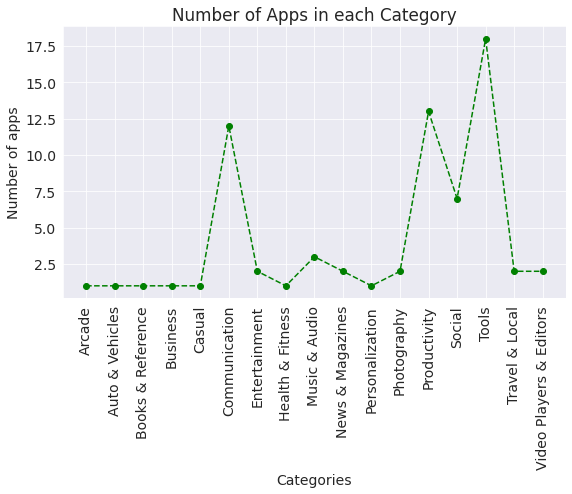

In [61]:
plt.plot(Category_count, 'o--g')
plt.xlabel('Categories')
plt.ylabel('Number of apps')
plt.xticks(rotation=90)
plt.title('Number of Apps in each Category');


In the visualization above, we can see that the 'tools' Category is the most popular with about tools app on playstore

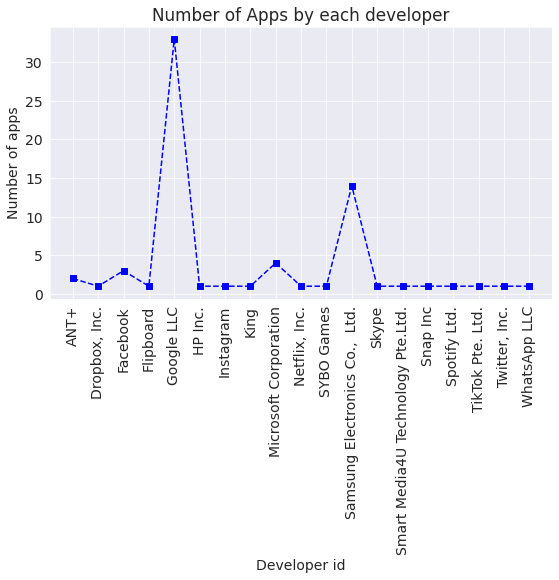

In [62]:
plt.plot(DeveloperId_count, 's--b')
plt.xlabel('Developer id')
plt.ylabel('Number of apps')
plt.xticks(rotation=90)
plt.title('Number of Apps by each developer');


And again we can see that Google LLC has most of the apps on Playstore

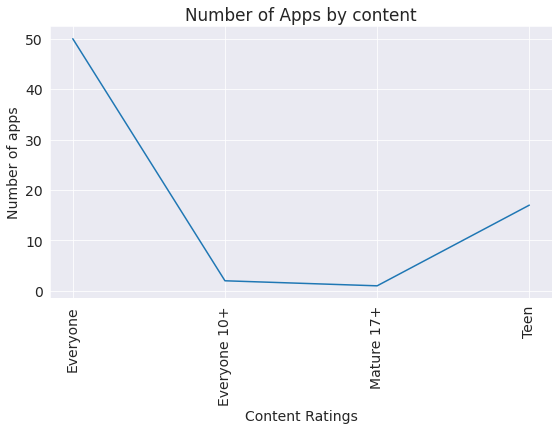

In [86]:
# Now lets see which content rating is more popular
plt.plot(Contentrating_Count)
plt.xlabel('Content Ratings')
plt.ylabel('Number of apps')
plt.xticks(rotation=90)
plt.title('Number of Apps by content');

The most popular content rating is 'Everyone' followed by 'Teen'

In [87]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "momohemmanuel370/top-apps-in-google-play" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/momohemmanuel370/top-apps-in-google-play


'https://jovian.ai/momohemmanuel370/top-apps-in-google-play'

Lastly Lets check how many apps support ads and how many donot

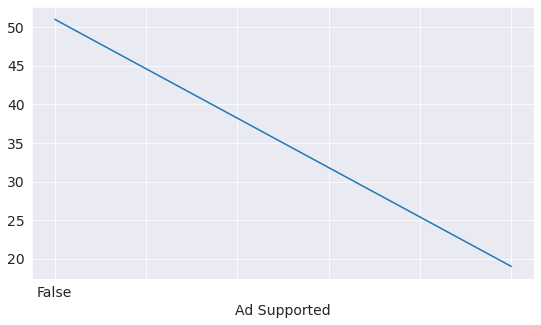

In [181]:
# Now lets see how many ads has ads 
Adsupported_Count.plot();


We have 51 apps without ads and 19 with ads

In [133]:
# Lets create another dataframe with the app name

new_apps = apps[['Unnamed: 0','App Name','Category','Developer Id','Content Rating','Ad Supported']]

In [158]:
# I replaced the spaces in the columns name with underscore

new_apps.columns = [c.replace(' ', '_') for c in new_apps.columns]

In [159]:
new_apps

,Unnamed:_0,App_Name,Category,Developer_Id,Content_Rating,Ad_Supported
0,1,Google Play services,Tools,Google LLC,Everyone,False
1,2,YouTube,Video Players & Editors,Google LLC,Teen,True
2,3,Google,Tools,Google LLC,Everyone,True
3,4,Google Maps - Navigate & Explore,Travel & Local,Google LLC,Everyone,True
4,5,Google Text-to-Speech,Tools,Google LLC,Everyone,False
...,...,...,...,...,...,...
65,66,Clock,Tools,Google LLC,Everyone,False
66,67,Spotify: Listen to podcasts & find music you love,Music & Audio,Spotify Ltd.,Teen,True
67,68,Google Translate,Tools,Google LLC,Everyone,False
68,69,Samsung Notes,Productivity,"Samsung Electronics Co., Ltd.",Everyone,False


Now we know that the most popular apps fall under the following criteria

1. Category is 'Tools'
2. Developer Id is 'Google LLC'
3. Content Rating is 'Everyone'
4. Ad support is 'False'

Now lets filter our data based on these criteria

In [170]:
# Filtering Data

Most_popular_apps = new_apps[(new_apps.Category == "Tools") & (new_apps.Developer_Id == "Google LLC") & (new_apps.Content_Rating == "Everyone") & (new_apps.Ad_Supported == False)]


In [174]:
Most_popular_apps

,Unnamed:_0,App_Name,Category,Developer_Id,Content_Rating,Ad_Supported
0,1,Google Play services,Tools,Google LLC,Everyone,False
4,5,Google Text-to-Speech,Tools,Google LLC,Everyone,False
7,8,Android Accessibility Suite,Tools,Google LLC,Everyone,False
15,16,Android System WebView,Tools,Google LLC,Everyone,False
20,21,Gboard - the Google Keyboard,Tools,Google LLC,Everyone,False
50,51,Google Play Services for AR,Tools,Google LLC,Everyone,False
58,59,Files by Google,Tools,Google LLC,Everyone,False
65,66,Clock,Tools,Google LLC,Everyone,False
67,68,Google Translate,Tools,Google LLC,Everyone,False
69,70,Calculator,Tools,Google LLC,Everyone,False


Now Lets Extra the apps accordingly 

In [177]:
Most_popular_apps.App_Name

# As we can see below are the most popular apps

0             Google Play services
4            Google Text-to-Speech
7      Android Accessibility Suite
15          Android System WebView
20    Gboard - the Google Keyboard
50     Google Play Services for AR
58                 Files by Google
65                           Clock
67                Google Translate
69                      Calculator
Name: App_Name, dtype: object

In [ ]:
import jovian

In [178]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "momohemmanuel370/top-apps-in-google-play" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/momohemmanuel370/top-apps-in-google-play


'https://jovian.ai/momohemmanuel370/top-apps-in-google-play'

## Asking and Answering Questions

Lets ask and answer some questions with the analysis we just did

## Questions

1. Which Category is the most popular
2. Which Developer is the most popular
3. Apps with or without ads which do we have more on playstore
4. What is the content rating for majority of the apps on Google play


## Answers

1. The most popular category is 'Tools'
2. The most popular developer is 'Google LLC'
3. We have more apps without ads than with ads
4. Majority of apps on playstore rating is 'Everyone'




In [152]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

## Inferences and Conclusion


From the Analysis, we can concoclude that the most popular apps are 


* Play services
* Google Text-to-Speech
* Android Accessibility Suite
* Android System WebView
* Gboard - the Google Keyboard
* Google Play Services for AR
* Files by Google
* Clock
* Google Translate
* Calculator

In [154]:
import jovian

In [183]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "momohemmanuel370/top-apps-in-google-play" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/momohemmanuel370/top-apps-in-google-play


'https://jovian.ai/momohemmanuel370/top-apps-in-google-play'